In [1]:
from probability import *
from information import *

In [2]:
%reload_ext autoreload

%autoreload 2

In [3]:
net = CNN()
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

mnist_train = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

mnist_test = torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)

total_step = len(mnist_train)


In [4]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.002)    

In [5]:
net.train()
num_epochs = 10
information = Information(net, mnist_train)
information.get_X_Y()
torch.save(net.state_dict(), f"epoch_0.pth")
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train):
        output = net(images)[0]
        loss = loss_func(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            torch.save(net.state_dict(), f"epoch_{epoch + 1}.pth")


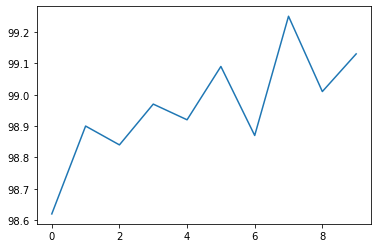

In [6]:
def test(epoch_path):
    net.load_state_dict(torch.load(epoch_path))
    net.eval()
    correct = 0

    for i, (images, labels) in enumerate(mnist_test):
        test_output, last_layer = net(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        correct += pred_y.eq(labels.data.view_as(pred_y)).sum()
    
    return correct / len(mnist_test)

accuracy_by_epoch = []
for i in range(11):
    str_i = str(i)
    acc = test(f'epoch_{str_i}.pth')
    accuracy_by_epoch.append(acc)

plt.plot(accuracy_by_epoch[1:])